In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

C:\Users\irmew01\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
cntryname = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','GRC',
             'ITA', 'JPN', 'NLD', 'NZL','NOR','PRT','ESP','SWE','GBR','USA']

In [3]:
trade = pd.read_csv("./output/model-data-trade.csv")

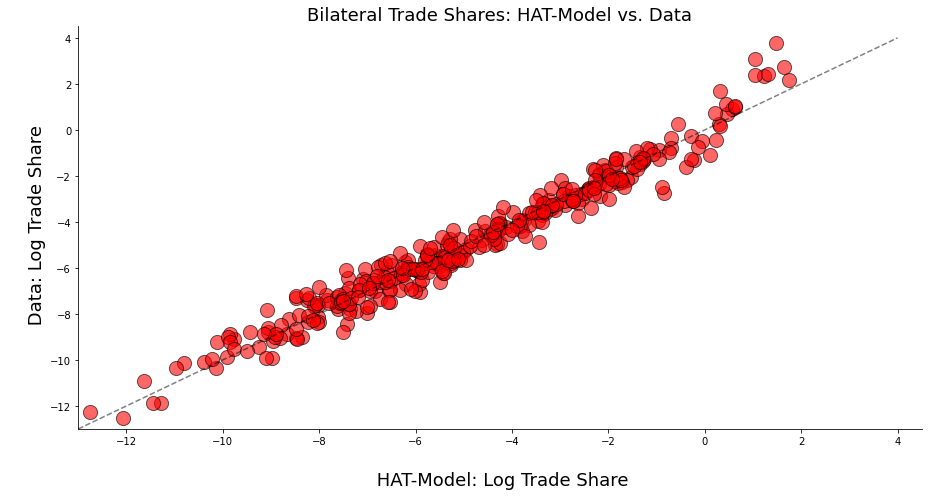

In [4]:
fig, ax = plt.subplots(figsize = [13.0,7.0], tight_layout = True)

ax.scatter(trade.trademodel, trade.trade, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-13,5), range(-13,5), alpha = 0.50, linestyle = "--", c = "black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade Shares: HAT-Model vs. Data", fontsize = 18)

ax.set_xlabel("\n HAT-Model: Log Trade Share", fontsize = 18)
ax.set_ylabel("\n Data: Log Trade Share" , fontsize = 18)

plt.savefig("../notes/figures/trade-fit.pdf", bbox_inches = "tight")

ax.set_ylim(-13.0,4.5)
ax.set_xlim(-13.0,4.5)

plt.show()

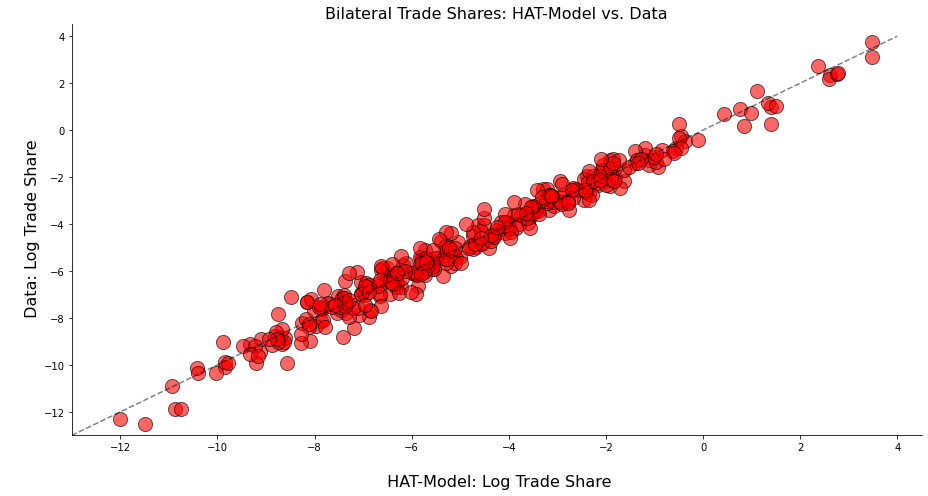

In [5]:
trade = pd.read_csv("./output/log-model-data-trade.csv")

fig, ax = plt.subplots(figsize = [13.0,7.0], tight_layout = True)

ax.scatter(trade.trademodel, trade.trade, alpha = 0.60, c = "red", edgecolors = "black", s = 200)

ax.plot(range(-13,5), range(-13,5), alpha = 0.50, linestyle = "--", c = "black")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Bilateral Trade Shares: HAT-Model vs. Data", fontsize = 16)

ax.set_xlabel("\n HAT-Model: Log Trade Share", fontsize = 16)
ax.set_ylabel("\n Data: Log Trade Share" , fontsize = 16)

plt.savefig("../notes/figures/log-trade-fit.pdf", bbox_inches = "tight")

ax.set_ylim(-13.0,4.5)
ax.set_xlim(-13.0,4.5)

plt.show()

In [6]:
elasty = pd.read_csv("./output/elasticity-by-partner-19.csv")

In [7]:
-elasty["θ"][1] * np.ones(10)

array([4.22988238, 4.22988238, 4.22988238, 4.22988238, 4.22988238,
       4.22988238, 4.22988238, 4.22988238, 4.22988238, 4.22988238])

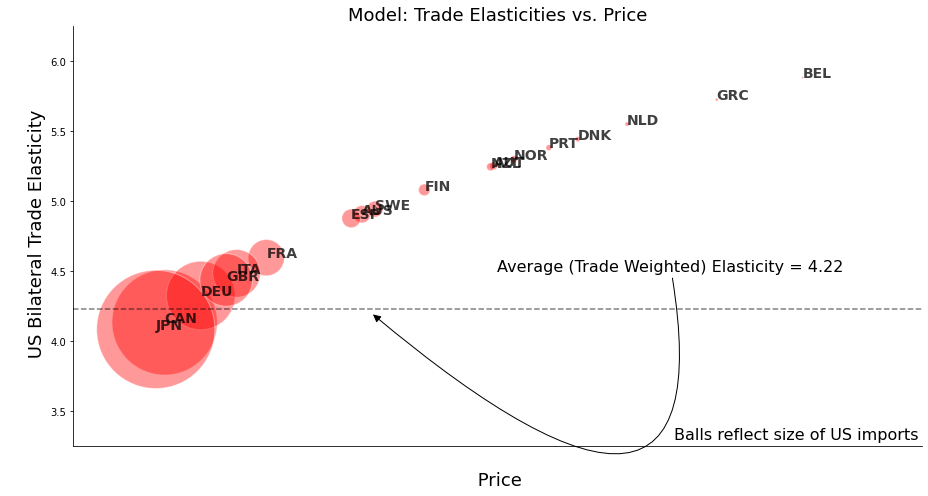

In [8]:
fig, ax = plt.subplots(figsize = [13.0,7.0], tight_layout = True)

ax.scatter(elasty.p, -elasty["θij"], alpha = 0.40,
           c = "red", edgecolors = "white",
           s = 500000*elasty.trade)

ax.plot(range(1,21), -elasty["θ"][1] * np.ones(20), alpha = 0.50, linestyle = "--", c = "black")

for i, txt in enumerate(cntryname[0:18]):
    ax.annotate(txt, (elasty.p[i], -elasty.θij[i]), 
                fontsize = 14, weight='bold', color = "black", alpha = 0.75)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Model: Trade Elasticities vs. Price", fontsize = 18)

ax.set_xlabel("\n Price", fontsize = 18)
ax.set_ylabel("\n US Bilateral Trade Elasticity" , fontsize = 18)

ax.set_xticks([])

ax.set_ylim(3.25, 6.25)
ax.set_xlim(1.0, 13)

ax.text(9.5, 3.30, "Balls reflect size of US imports", fontsize = 16)

ax.annotate(
    "Average (Trade Weighted) Elasticity = 4.22", 
    xy=(5.22, 4.2), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(7.0, 4.5), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=280,angleB=-40",
        "color": "black"
    },
    fontsize=16,
)

plt.savefig("../notes/figures/us-elasticity.pdf", bbox_inches = "tight")

plt.show()

In [9]:
elasty = pd.read_csv("./output/log-elasticity-by-partner-19.csv")

In [10]:
-elasty["θ"][1] * np.ones(10)

array([4.22119038, 4.22119038, 4.22119038, 4.22119038, 4.22119038,
       4.22119038, 4.22119038, 4.22119038, 4.22119038, 4.22119038])

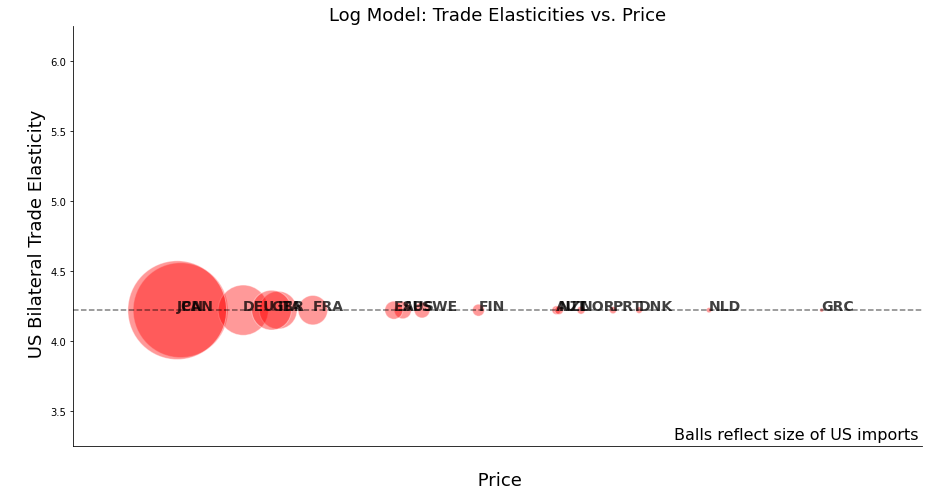

In [12]:
fig, ax = plt.subplots(figsize = [13.0,7.0], tight_layout = True)

ax.scatter(elasty.p, -elasty["θij"], alpha = 0.40,
           c = "red", edgecolors = "white",
           s = 500000*elasty.trade)

ax.plot(range(1,21), -elasty["θ"][1] * np.ones(20), alpha = 0.50, linestyle = "--", c = "black")

for i, txt in enumerate(cntryname[0:18]):
    ax.annotate(txt, (elasty.p[i], -elasty.θij[i]), 
                fontsize = 14, weight='bold', color = "black", alpha = 0.75)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Log Model: Trade Elasticities vs. Price", fontsize = 18)

ax.set_xlabel("\n Price", fontsize = 18)
ax.set_ylabel("\n US Bilateral Trade Elasticity" , fontsize = 18)

ax.set_xticks([])

ax.set_ylim(3.25, 6.25)
ax.set_xlim(1.0, 13)

ax.text(9.5, 3.30, "Balls reflect size of US imports", fontsize = 16)

plt.savefig("../notes/figures/log-us-elasticity.pdf", bbox_inches = "tight")

plt.show()